### Referências
https://realpython.com/python-scipy-fft/#creating-a-signal <br>
https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/ <br>
https://en.wikipedia.org/wiki/Discrete_Fourier_transform <br>
https://www.youtube.com/watch?v=mkGsMWi_j4Q <br>

## Transformada de Fourier

### O que é a Transformada de Fourier?
- A transformada de Fourier é uma transformação matemática que "quebra" uma forma de onda (função ou sinal) em uma soma de funções periódicas. 
- A análise de Fourier converte um sinal do seu domínio original para uma representação no domínio da frequência.
- Jean-Baptiste Joseph Fourier (Auxerre, 21 de março de 1768 — Paris, 16 de maio de 1830) foi o matemático e físico francês que descobriu que todo sinal pode ser descrito como uma superposição de senóides complexas. <br>

### Sinais
Os sinais traduzem a evolução de uma grandeza ao longo do tempo ou espaço e podem ser classificados segundo os critérios:
- **Continuidade**: sinais contínuos ou discretos
- **Periodicidade**: sinais periódicos ou aperiódicos 

#### Sinais contínuos
Um sinal diz-se contínuo se o seu domínio for IR ou um intervalo contínuo de IR.

$$ x: IR \rightarrow IR $$

$$ x: [a,b] \rightarrow IR$$

- Sinais contínuos são sinais que não possuem espaços distinguíveis entre os seus valores.
- Advém de grandezas que podem ser medidas.

#### Sinais discretos
- Sinais discretos são sinais que possuem espaços entre os seus valores.
- Advém de grandezas que são contadas.
- Só os sinais discretos podem ser armazenados e processados em computadores digitais.
- Pode-se converter um sinal contínuo num sinal discreto através da coleção de amostras do sinal contínuo.

#### Sinal periódico
Um sinal discreto x(n) é periódico com período $N \ \in \ IN$ se:

$$ \large x(n + N) = x(n), \forall \ n \ \in Z $$

### Abordagens

De acordo com o tipo de sinal que estamos lidando, existem 4 diferentes tipos de abordagem:
- Sinais contínuos e aperiódicos: Transformada de Fourier
- Sinais contínuos e periódicos: Série de Fourier
- Sinais discretos e aperiódicos: Transformada de Fourier de Tempo Discreto (TFTD)
- Sinais discretos e periódicos: Transformada Discreta de Fourier (TDF)

### Transformada Discreta de Fourier (DFT)
Para um sequência finita de valores complexos ou reais $x_{n}$ obtidos pela amostragem de N valores de um sinal contínuo nos instantes $f(0), f(1), f(2), ... f(k), ... f(N-1)$, a Fórmula para a **Transformada Discreta de Fourier** é: 
$$ \large X_{k} = \sum_{n = 0}^{N-1} x_{n} \cdot e^{-j2\pi\frac{kn}{N}} $$
- $x_{n}$ é a amplitude (real ou complexo) de um sinal periódico em um instante de tempo $t$. Tais valores são obtidos por amostragem de uma função periódica contínua.
- O resultado dessa fórmula é uma série de números complexos no domínio da frequência.
- O TDF se tornou bastante utilizado em computação numérica devido ao algoritmo chamado **Transformada Rápida de Fourier**, que é um método bastante eficiente para se calcular a Transformada Discreta de Fourier (DFT) e a sua inversa.
- Vamos calcular a Transformada Discreta de Fourier pelo algoritmo rápido usando a função 'fft' da biblioteca Scipy do Python.
### Exemplo
- Supondo 2 ondas senoidais de frequências 2Hz e 3Hz. Se somarmos ambas as ondas obteríamos uma onda de forma um pouco mais complicada:

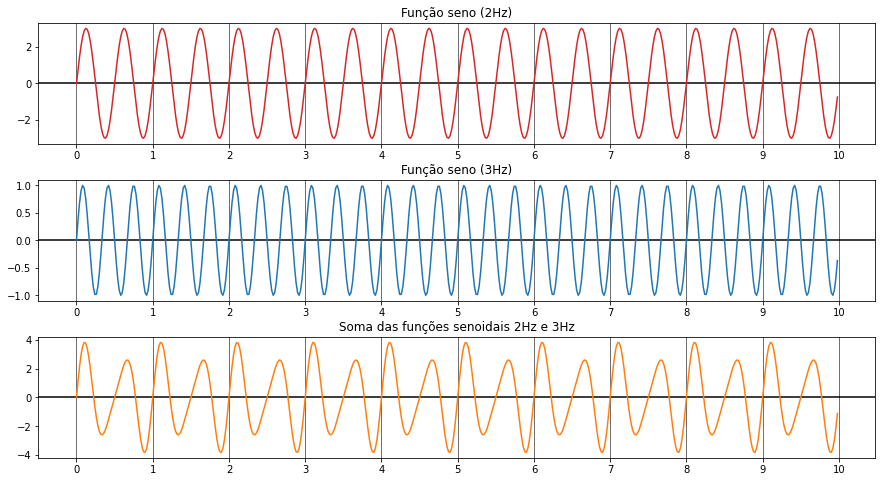

In [2]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 50 # Hertz
tempo = 10  # Segundos

tempoTicks = [x for x in range(tempo+1)]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(15,8))

# ajustando a distância vertical entre os plots
f.subplots_adjust(hspace=0.3)

def ondaSeno(freq, sample_rate, tempo, amp = 1):
    # gera 'sample_rate * tempo' amostras
    x = np.linspace(0, tempo, sample_rate * tempo, endpoint=False)
    # multiplica cada amostra pela frequência
    frequencias = x * freq
    # np.sin(ângulo em radianos)
    y = amp*np.sin((2 * np.pi) * frequencias)
    return x, y

ax1.set_title("Função seno (2Hz)")
ax2.set_title("Função seno (3Hz)")
ax3.set_title("Soma das funções senoidais 2Hz e 3Hz")

# Gerando uma onda senoidal de 2Hz
x, y = ondaSeno(2, SAMPLE_RATE, tempo, amp = 3)
# Gerando uma onda senoidal de 3Hz
x1, y1 = ondaSeno(3, SAMPLE_RATE, tempo)

ax1.grid(True, axis = 'x', alpha = 0.7 , color = 'black', which='both')
ax2.grid(True, axis = 'x', alpha = 0.7 , color = 'black', which='both')
ax3.grid(True, axis = 'x', alpha = 0.7 , color = 'black', which='both')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10])

ax1.set_xticks(tempoTicks)
ax2.set_xticks(tempoTicks)
ax3.set_xticks(tempoTicks)

ax1.axhline(y=0, color='black')
ax2.axhline(y=0, color='black')
ax3.axhline(y=0, color='black')

ysoma = y + y1

ax1.plot(x, y, 'tab:red')
ax2.plot(x1, y1, 'tab:blue')
ax3.plot(x1, ysoma, 'tab:orange')

plt.show()

- A função **fft** aplicado no sinal resultante retornará uma série de números complexos. Utilizaremos os valores absolutos desses números complexos na plotagem do gráfico.
- Esse plot exibirá picos de frequência que nos indicará as frequências dos componentes originais que deu origem ao sinal resultante. 
- No exemplo abaixo, os picos de frequências estão em $2Hz$ e $3Hz$.

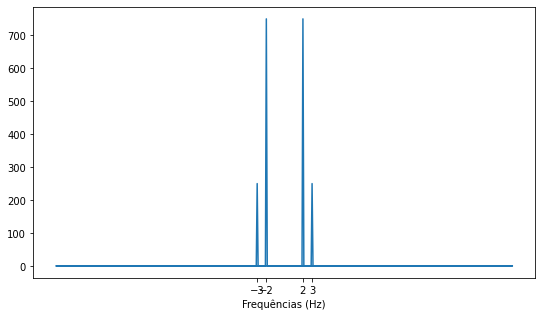

In [4]:
from scipy.fft import fft, fftfreq

f, ax1 = plt.subplots(1, 1, sharex=False, figsize=(9,5))

ysoma = y + y1

# Number of samples in normalized_tone
N = SAMPLE_RATE * tempo

yf = fft(ysoma)
xf = fftfreq(N, 1 / SAMPLE_RATE)
ax1.set_xticks([-3,-2,2,3])
ax1.set_xlabel("Frequências (Hz)")
ax1.plot(xf, np.abs(yf))
plt.show()

### Exemplo 2: Filtrando ruídos
- Vamos considerar um exemplo hipotético de um sinal dotado de ruídos e que originalmente veio da soma de dois sinais de frequências $50Hz$ e $120Hz$.
- O sinal "limpo" sem ruídos é representado em cor vermelha, ao passo que o sinal com ruídos está na cor azul ciano.

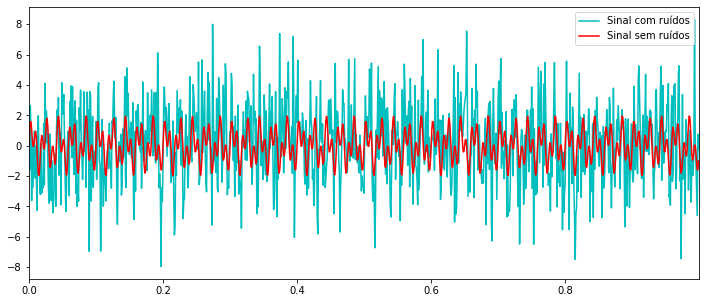

In [5]:
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12,5))

dt = 0.001

# vetor tempo de 1000 elementos, indo de 0 a 1
t = np.arange(0,1,dt)

# criando e somando senóides de frequência 50 e 120
f = np.sin((2*np.pi)*50*t) + np.sin((2*np.pi)*120*t)

# sinal resultante sem ruído
f_clean = f

# adicionando ruídos à soma
f = f + 2.5*np.random.randn(len(t))

# 1000
# print(len(f))

ax.plot(t,f, color='c', label = 'Sinal com ruídos')
ax.plot(t,f_clean, color='red', label = 'Sinal sem ruídos')
# setando um limite para o eixo x
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

- Vamos aplicar a **Transformada Rápida de Fourier** no sinal com ruído, plotar o resultado e trabalhar os dados de modo a eliminar a metade espelhada.
- Uma vez eliminada, obteremos um plot que nos exibirá as frequências correspondentes aos ruídos (frequências menores) e as frequências dos sinais componentes que deu origem ao sinal que queremos (picos de frequências). 
- Aplicaremos, então, um **filtro** de modo a selecionar apenas as frequências maiores que $100Hz$ para selecionar apenas os picos de frequência e eliminar os ruídos. 
- Essas frequências filtradas serão submetidas, então, à **Transformada Discreta Inversa de Fourier** com o uso da função **ifft** para obtermos, por fim, o sinal limpo sem ruídos.

c:\users\t-gamer\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


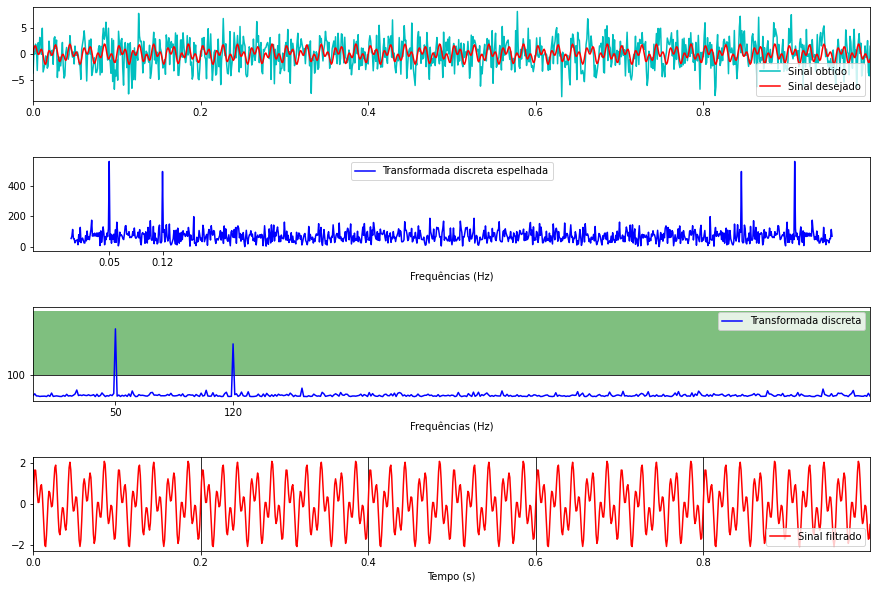

In [42]:
# 1000
n = len(t)

# Transformada discreta do sinal com ruído
# O resultado é um array de números complexos
fhat = np.fft.fft(f,n)

# Multiplicando cada número complexo pelo seu conjugado
# PSD é um vetor de números reais
PSD = fhat * np.conj(fhat) / n

PSD = PSD.real

# print(PSD[:10])
# 1000
# print(len(PSD))

freq = (1/(dt*n)) * np.arange(n)
# [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
# print(freq[:10])
# 1000
# print(len(freq))

L  = np.arange(1, np.floor(n/2), dtype = 'int')
# 500
# print(np.floor(n/2))
# [490 491 492 493 494 495 496 497 498 499]
# print(L[-10:])
# 499
# print(len(L))

fig, axs = plt.subplots(4,1, figsize=(15,10))

# ajustando a distância vertical entre os plots
fig.subplots_adjust(hspace=0.6)

# Sinal com ruído e sem ruído
plt.sca(axs[0])
plt.plot(t,f, color = 'c', label = 'Sinal obtido')
plt.plot(t,f_clean, color='red',  label = 'Sinal desejado')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
axs[1].set_xticks([0.05,0.12])
axs[1].set_xlabel("Frequências (Hz)")
plt.plot(t,np.abs(fhat), color = 'blue', label = 'Transformada discreta espelhada') 
# plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

axs[2].set_xticks([50,120])
axs[2].set_yticks([100])
axs[2].grid(True, axis = 'y', alpha = 1 , color = 'black', which='both')
axs[2].set_xlabel("Frequências (Hz)")

plt.sca(axs[2])
plt.plot(freq[L],PSD[L], color = 'blue', label = 'Transformada discreta') 
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

axs[2].fill_between(freq[L], 100, 400, where=np.abs(PSD[L]) > 0j, facecolor='green', alpha=0.5)

# indices: vetor de valores booleanos
# vamos filtrar os ruídos e eliminar aqueles com valores menores que 100
indices = PSD > 100
PSDclean = PSD + indices
# print(PSD[:51])
# print(PSDclean[:51])
fhat = indices * fhat

# Transformada inversa dos valores filtrados 
ffilt = np.fft.ifft(fhat)

axs[3].grid(True, axis = 'x', alpha = 1 , color = 'black', which='both')

plt.sca(axs[3])
plt.plot(t, ffilt, color = 'red', label = 'Sinal filtrado')
plt.xlim(t[0], t[-1])
axs[3].set_xlabel("Tempo (s)")
plt.legend()

plt.show()

- Podemos ver que o sinal filtrado é exatamente igual ao sinal original sem os ruídos

c:\users\t-gamer\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


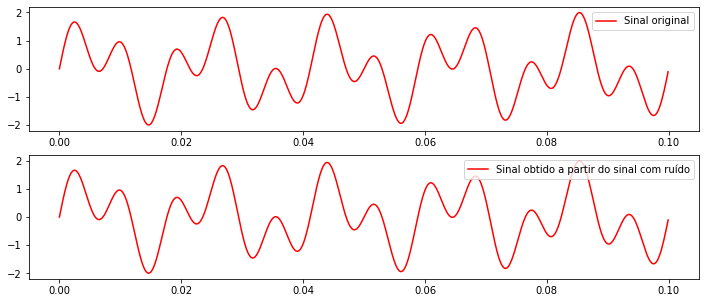

In [44]:
import numpy as np
import matplotlib.pyplot as plt

f, (ax, ax2) = plt.subplots(2,1,figsize=(12,5))

dt = 0.0001

t = np.arange(0,0.1,dt)

f = np.sin((2*np.pi)*50*t) + np.sin((2*np.pi)*120*t)

n = len(t)

fhat = np.fft.fft(f,n)

PSD = fhat * np.conj(fhat) / n

PSD = PSD.real

freq = (1/(dt*n)) * np.arange(n)

indices = PSD > 100
PSDclean = PSD + indices
fhat = indices * fhat

ffilt = np.fft.ifft(fhat)

L  = np.arange(1, np.floor(n/2), dtype = 'int')

ax.plot(t,f, color='red', label = 'Sinal original')
ax.legend()

ax2.plot(t, ffilt, color = 'red', label = 'Sinal obtido a partir do sinal com ruído')
ax2.legend()

plt.show()

### Aplicações
- Processamento digital de sinais para a resolução de equações diferenciais parciais.
- Em fones de ouvido com cancelamento de ruído. Ela converte o sinal original em componentes espectrais individuais e elimina os componentes indesejados.
- Em processamento de imagens, sendo utilizado para decompor uma imagem em seus componentes seno e cosseno.
- Na medicina, na técnica de Imagem por Ressonância Magnética.
- Em óptica, no estudo da difração da luz quando ela passa por fendas estreitas. 
- Na geologia e exploração de petróleo, na análise de dados sísmicos.